In [1]:
import altair as alt
import polars as pl

alt.data_transformers.enable("vegafusion")
alt.renderers.enable("png")

RendererRegistry.enable('png')

## Ingest

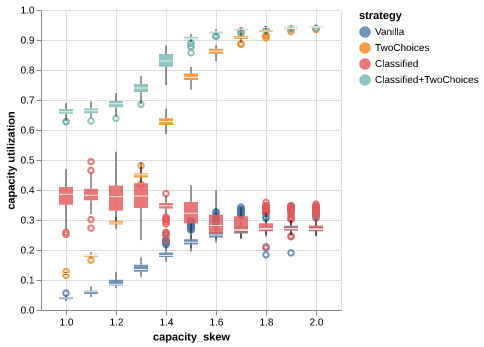

In [3]:
df = pl.read_csv(
    "ingest/*-sys.csv", schema_overrides={"capacity_skew": pl.Float32}
).with_columns(
    (pl.col("utilized_capacity") / pl.col("total_capacity")).alias(
        "capacity utilization"
    ),
    (pl.col("total_capacity") / pl.col("num_node")).alias("average node capacity"),
)
(
    alt.Chart(df)
    .mark_boxplot(opacity=0.8)
    .encode(
        alt.X("capacity_skew").scale(zero=False),
        alt.Y("capacity utilization"),
        alt.Color("strategy").sort(
            ["Vanilla", "Classified", "TwoChoices", "Classified+TwoChoices"]
        ),
    )
)

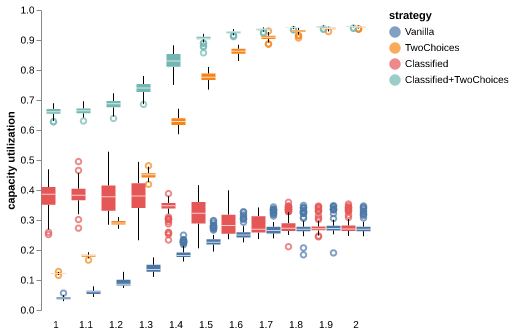

In [24]:
(
    alt.Chart(df)
    .mark_boxplot()
    .encode(
        alt.X("strategy").axis(None),
        alt.Y("capacity utilization"),
        alt.Color("strategy").sort(
            ["Vanilla", "Classified", "TwoChoices", "Classified+TwoChoices"]
        ),
        alt.Column("capacity_skew").header(title=None, labelOrient="bottom").spacing(0),
    )
    .configure_axis(grid=False)
    .configure_view(stroke=None)
    .properties(width=20)
)

In [25]:
df = pl.read_csv(
    "ingest/*-bin.csv", schema_overrides={"capacity_skew": pl.Float32}
).with_columns(
    (pl.col("bin_capacity") / pl.col("num_bin_node")).alias("bin average capacity"),
    (pl.col("bin_used_capacity") / pl.col("bin_capacity")).alias("bin utilization"),
    (pl.col("bin_hit_count") / pl.col("num_bin_node")).alias("bin average hit"),
    (pl.col("bin_hit_count") / pl.col("bin_capacity")).alias("bin capacity frequency"),
)
df

num_node,node_min_capacity,node_max_capacity,capacity_skew,num_copy,strategy,bin_index,num_bin_node,bin_hit_count,bin_capacity,bin_used_capacity,bin_max_utilization,bin average capacity,bin utilization,bin average hit,bin capacity frequency
i64,i64,i64,f32,i64,str,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64
12000,1024,102400,1.0,3,"""Vanilla""",0,7395,2942244,8577888,2938623,1.0,1159.957809,0.342581,397.869371,0.343003
12000,1024,102400,1.0,3,"""Vanilla""",1,1064,421633,3070267,421633,0.601559,2885.589286,0.137328,396.271617,0.137328
12000,1024,102400,1.0,3,"""Vanilla""",2,858,338361,4997549,338361,0.2180279,5824.649184,0.067705,394.36014,0.067705
12000,1024,102400,1.0,3,"""Vanilla""",3,758,300759,8990150,300759,0.103598,11860.356201,0.033454,396.779683,0.033454
12000,1024,102400,1.0,3,"""Vanilla""",4,690,272461,16360869,272461,0.070975,23711.404348,0.016653,394.871014,0.016653
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
12000,1024,102400,2.0,3,"""Classified+TwoChoices""",0,11993,11729909,12321368,11684664,1.0,1027.379972,0.948325,978.062953,0.951997
12000,1024,102400,2.0,3,"""Classified+TwoChoices""",1,7,18724,18845,18640,1.0,2692.142857,0.989122,2674.857143,0.993579
12000,1024,102400,2.0,3,"""Classified+TwoChoices""",0,11991,11702689,12324127,11669031,1.0,1027.781419,0.946844,975.95605,0.949575


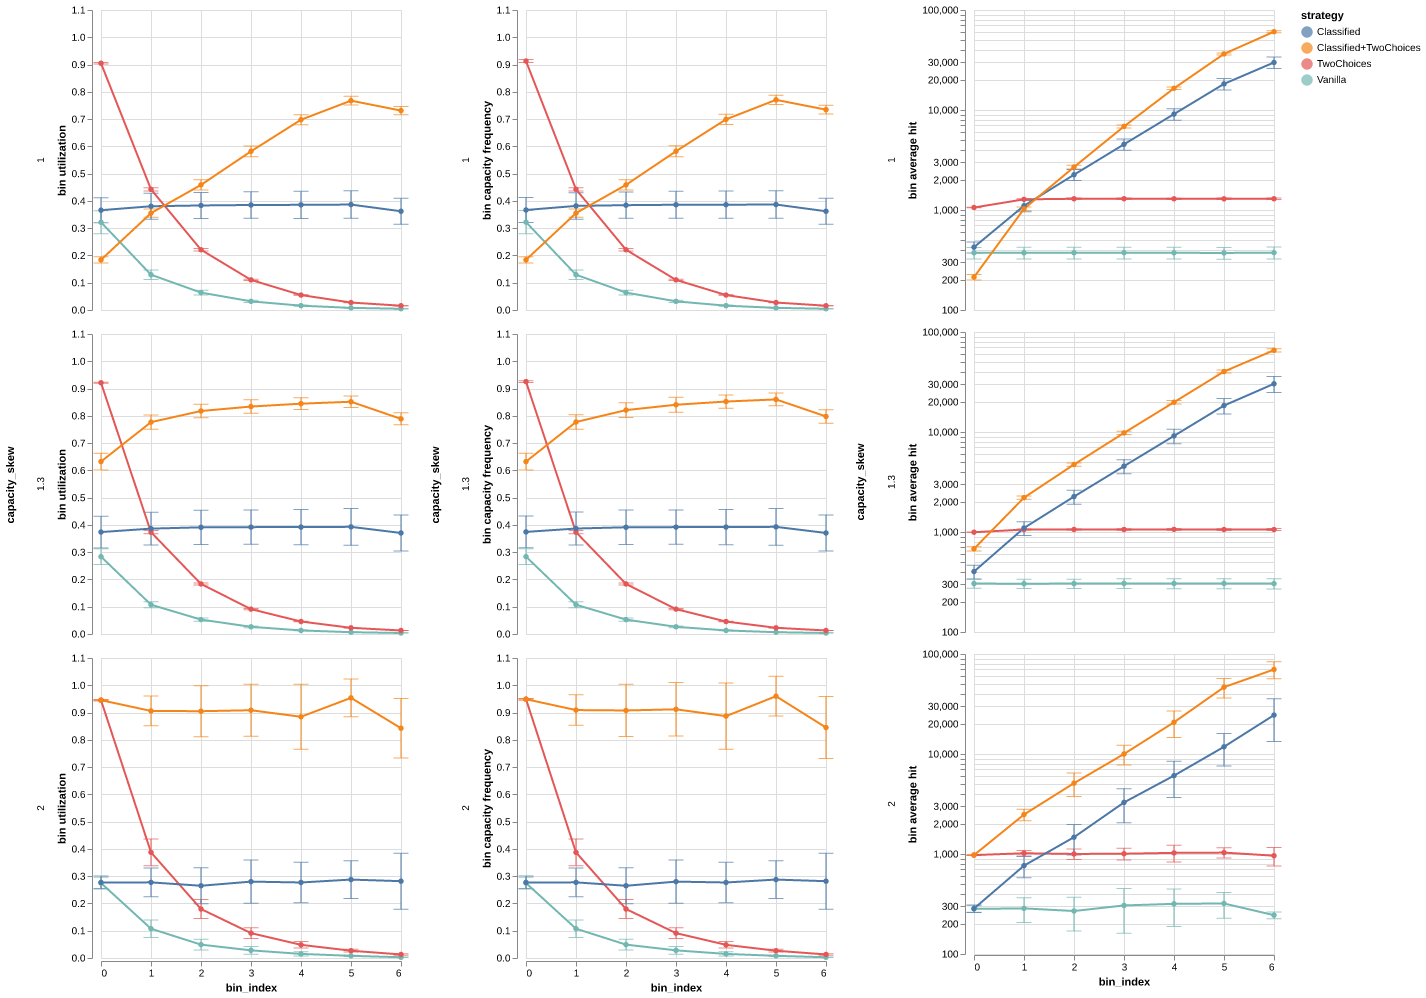

In [ ]:
f = pl.col("capacity_skew") == 1.0
f |= pl.col("capacity_skew") == 1.3
f |= pl.col("capacity_skew") == 2.0
chart = alt.Chart(df.filter(f)).encode(
    alt.X("bin_index"),
    alt.Color("strategy"),
    alt.XOffset("strategy"),
)


def chart(col, y_scale="linear"):
    return (
        chart.encode(alt.Y(col).scale(type=y_scale)).mark_errorbar(
            extent="stdev", ticks=True
        )
        + chart.encode(alt.Y(col, aggregate="mean")).mark_line(point=True)
    ).facet(row="capacity_skew")


chart("bin utilization") | chart("bin capacity frequency") | chart(
    "bin average hit", "log"
)

## Frequency

### Storage frequency balance across classes

In [ ]:
df = (
    pl.read_csv("freq/*-class.csv")
    .with_columns(
        (
            pl.col("class_hit_count") / pl.col("num_find") / pl.col("num_class_node")
        ).alias("class node frequency"),
    )
    .with_columns(
        (pl.col("class node frequency") / pl.col("class_capacity")).alias(
            "class storage frequency"
        ),
    )
)
df

strategy,num_node,num_find,find_size,num_class,skew,class,num_class_node,class_capacity,class_hit_count,class node frequency,class storage frequency
str,i64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64
"""Vanilla""",10000,1000000,3,8,1,0,163804,163804,49181137,0.0003,1.8329e-9
"""Vanilla""",10000,1000000,3,8,1,1,135424,325018,40557524,0.000299,9.2144e-10
"""Vanilla""",10000,1000000,3,8,1,2,124762,657266,37490232,0.0003,4.5719e-10
"""Vanilla""",10000,1000000,3,8,1,3,118135,1302985,35409148,0.0003,2.3004e-10
"""Vanilla""",10000,1000000,3,8,1,4,116188,2622068,34845516,0.0003,1.1438e-10
…,…,…,…,…,…,…,…,…,…,…,…
"""Classified""",10000,1000000,3,8,1,3,118465,1306774,9731118,0.000082,6.2860e-11
"""Classified""",10000,1000000,3,8,1,4,115407,2604535,18924662,0.000164,6.2960e-11
"""Classified""",10000,1000000,3,8,1,5,114265,5222635,37451145,0.000328,6.2757e-11


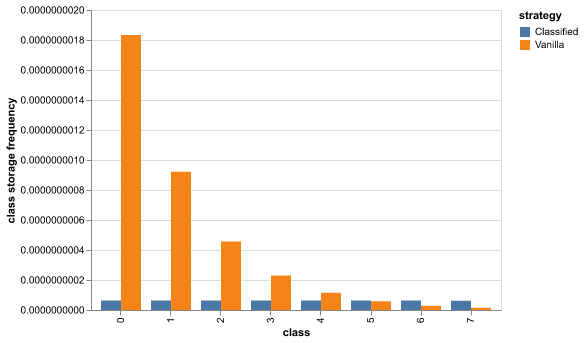

In [ ]:
chart = (
    alt.Chart(df)
    .mark_bar()
    .encode(
        alt.X("class:N"),
        alt.Y("class storage frequency"),
        alt.Color("strategy"),
        alt.XOffset("strategy"),
    )
)
chart

In [33]:
chart.save("graphs/freq-class.pdf")

### Node frequency CDF

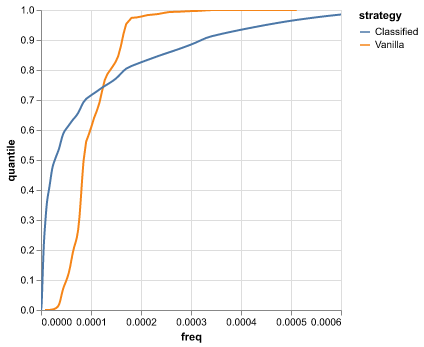

In [ ]:
df = pl.read_csv("freq/*-node.csv")
df
chart = (
    alt.Chart(df)
    .mark_line(clip=True)
    .encode(
        alt.X("freq").scale(domainMax=0.0006), alt.Y("quantile"), alt.Color("strategy")
    )
)
chart

In [35]:
chart.save("graphs/freq-node.pdf")

### Capacity frequency CDF

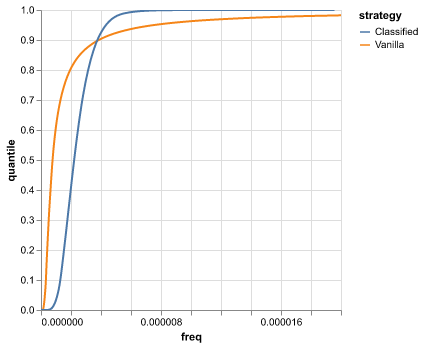

In [ ]:
df = pl.read_csv("freq/*-capacity.csv")
df
chart = (
    alt.Chart(df)
    .mark_line(clip=True)
    .encode(
        alt.X("freq").scale(domainMax=0.00002),
        alt.Y("quantile"),
        alt.Color("strategy"),
    )
)
chart

In [37]:
chart.save("graphs/freq-capacity.pdf")

## Inject with rejection

### Number of attempts vs. utilized capacity

In [25]:
df = pl.read_csv("ingest-reject/*.csv").with_columns(
    (pl.col("num_stored") * pl.col("num_copy") / pl.col("supply")).alias("utilization")
)
df

num_node,node_min_capacity,capacity_multiplier,capacity_skew,num_copy,strategy,supply,num_attempt,store_rate,num_stored,utilization
i64,i64,i64,i64,i64,str,i64,i64,f64,i64,f64
12000,1024,128,1,3,"""Vanilla""",136508433,100000,1.0,100000,0.002198
12000,1024,128,1,3,"""Vanilla""",136508433,200000,1.0,200000,0.004395
12000,1024,128,1,3,"""Vanilla""",136508433,300000,1.0,300000,0.006593
12000,1024,128,1,3,"""Vanilla""",136508433,400000,1.0,400000,0.008791
12000,1024,128,1,3,"""Vanilla""",136508433,500000,1.0,500000,0.010988
…,…,…,…,…,…,…,…,…,…,…
12000,1024,128,1,3,"""Classified+TwoChoices""",140691860,9600000,1.0,9600000,0.204703
12000,1024,128,1,3,"""Classified+TwoChoices""",140691860,9700000,1.0,9700000,0.206835
12000,1024,128,1,3,"""Classified+TwoChoices""",140691860,9800000,1.0,9800000,0.208967


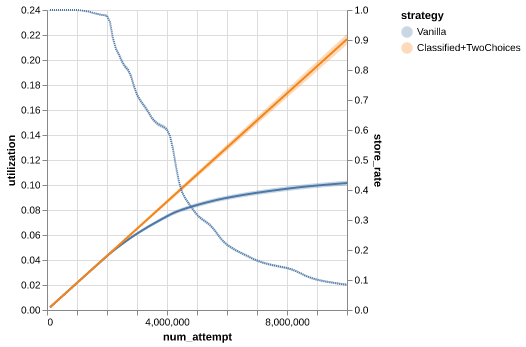

In [26]:
base = alt.Chart(df).encode(
    alt.X("num_attempt"),
    alt.Color("strategy").sort(["Classified+TwoChoices", "Vanilla"]),
)
num_stored = (
    base.encode(alt.Y("utilization")).mark_errorband(extent="stdev")
    + base.encode(alt.Y("utilization", aggregate="mean")).mark_line()
)
base = alt.Chart(df.filter(pl.col("strategy") == "Vanilla")).encode(
    alt.X("num_attempt")
)
store_rate = base.encode(
    alt.Y("store_rate", aggregate="mean").scale(domainMax=1.0)
).mark_line(strokeDash=[1, 1]) + base.encode(alt.Y("store_rate")).mark_errorband(
    extent="stdev"
)
reject = (
    alt.layer(num_stored, store_rate)
    .resolve_axis(y="independent")
    .resolve_scale(y="independent")
)
reject

In [13]:
chart.save("graphs/ingest-reject.pdf")